In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uszipcode import SearchEngine

In [6]:
df = pd.read_csv('data/Crime_Data_from_2010_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087209 entries, 0 to 2087208
Data columns (total 28 columns):
DR_NO             int64
Date Rptd         object
DATE OCC          object
TIME OCC          int64
AREA              int64
AREA NAME         object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc       object
Mocodes           object
Vict Age          int64
Vict Sex          object
Vict Descent      object
Premis Cd         float64
Premis Desc       object
Weapon Used Cd    float64
Weapon Desc       object
Status            object
Status Desc       object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION          object
Cross Street      object
LAT               float64
LON               float64
dtypes: float64(8), int64(7), object(13)
memory usage: 445.9+ MB


In [113]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.087209e+06,2.087209e+06,2.087209e+06,2.087209e+06,2.087209e+06,2.087209e+06,2.087209e+06,2.087158e+06,701950.000000,2.087199e+06,137163.000000,3428.000000,104.000000,2.087209e+06,2.087209e+06
mean,1.473310e+08,1.360831e+03,1.108983e+01,1.155371e+03,1.445696e+00,5.071392e+02,3.178733e+01,3.108555e+02,371.311534,5.069659e+02,950.404971,971.832847,975.105769,3.406359e+01,-1.183083e+02
std,2.858894e+07,6.470280e+02,6.011671e+00,6.011796e+02,4.970424e-01,2.105088e+02,2.062928e+01,2.111787e+02,113.520211,2.103741e+02,125.741505,86.266833,81.276338,7.150007e-01,2.452697e+00
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.214054e+08,9.300000e+02,6.000000e+00,6.430000e+02,1.000000e+00,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.401020e+01,-1.184365e+02
50%,1.506227e+08,1.430000e+03,1.100000e+01,1.189000e+03,1.000000e+00,4.420000e+02,3.200000e+01,2.100000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.406230e+01,-1.183295e+02
75%,1.713210e+08,1.900000e+03,1.600000e+01,1.668000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417580e+01,-1.182778e+02
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


            DATE  Crm Cd
0        2015-04     510
1        2015-07     510
2        2015-10     510
3        2015-08     510
4        2015-02     510
...          ...     ...
1089200  2019-03     648
1089201  2019-08     331
1089202  2019-01     930
1089203  2019-10     420
1089204  2019-02     330

[1089205 rows x 2 columns]


Text(0, 0.5, 'Number of crimes')

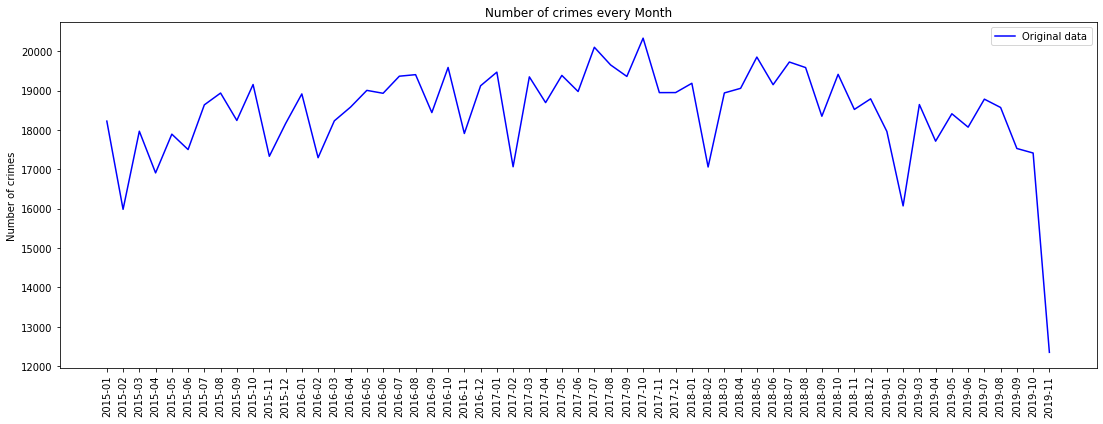

In [7]:
df["DATE"] = pd.to_datetime(df['DATE OCC'])
timeOccurences = df[["DATE","Crm Cd"]]

# only draw from 2015 to 2019
filterData = timeOccurences.set_index("DATE").loc['01/01/2015 12:00:00 AM':'12/31/2019 12:00:00 AM']

filterData.reset_index(inplace=True)
filterData['DATE'] = filterData['DATE'].map(lambda x:x.strftime("%Y-%m"))
print(filterData)

filterDataYearMonth = filterData.groupby('DATE').count()
fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(filterDataYearMonth, 
          c = 'blue', label = "Original data")
# axes.plot(timeOccurencesDedup.groupby('DATE').count(), 
#           c = 'green', label = "Dedup data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Number of crimes every Month")
axes.set_ylabel("Number of crimes")





            Crm Cd
DATE              
2015-01-01    1428
2015-01-02     514
2015-01-03     495
2015-01-04     510
2015-01-05     629
...            ...
2015-12-27     502
2015-12-28     546
2015-12-29     514
2015-12-30     549
2015-12-31     625

[365 rows x 1 columns]


Text(0, 0.5, 'Number of crimes')

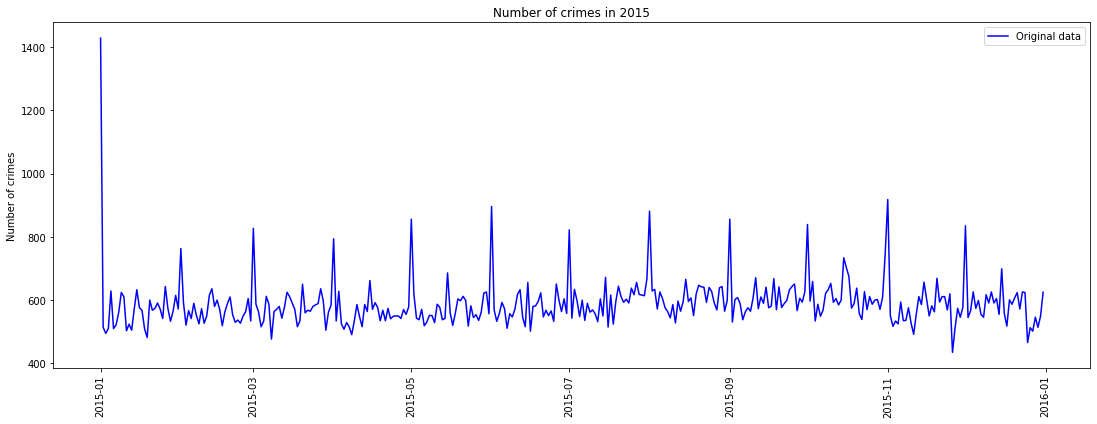

In [119]:
# time trend for 2015
filterData2015 = timeOccurences.set_index("DATE").loc['01/01/2015 12:00:00 AM':'12/31/2015 12:00:00 AM']
filterData2015.reset_index(inplace=True)
filterData2015Count = filterData2015.groupby('DATE').count()
print(filterData2015Count.sort_values(by=['DATE']))

fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(filterData2015Count, 
          c = 'blue', label = "Original data")
# axes.plot(timeOccurencesDedup.groupby('DATE').count(), 
#           c = 'green', label = "Dedup data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Number of crimes in 2015")
axes.set_ylabel("Number of crimes")


            Crm Cd
DATE              
2015-01-01       1
2015-01-02       1
2015-01-03       1
2015-01-04       2
2015-01-06       1
...            ...
2015-12-22       2
2015-12-25       1
2015-12-27       1
2015-12-29       1
2015-12-30       1

[188 rows x 1 columns]


Text(0, 0.5, 'Number of crimes with shooting')

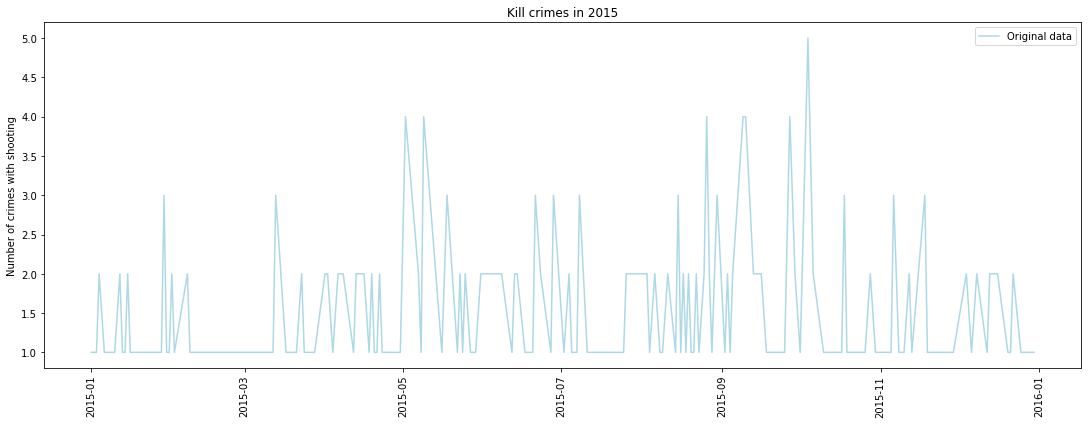

In [117]:

#110
filterData2015 = timeOccurences.set_index("DATE").loc['01/01/2015 12:00:00 AM':'12/31/2015 12:00:00 AM']
filterData2015.reset_index(inplace=True)
killingData = filterData2015[filterData2015["Crm Cd"] == 110]
killingData1 = killingData[["DATE","Crm Cd"]].groupby('DATE').count()
print(killingData1)

fig = plt.figure(figsize=(18,6))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(killingData1, 
          c = 'lightblue', label = "Original data")
# axes.plot(timeOccurencesDedup[timeOccurencesDedup["SHOOTING"] == "Y"].groupby('DATE').count(), 
#           c = 'black', label = "Dedup data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Kill crimes in 2015")
axes.set_ylabel("Number of crimes with Killing")



            DATE  Crm Cd
0        2015-04     510
1        2015-07     510
2        2015-10     510
3        2015-08     510
4        2015-02     510
...          ...     ...
1089200  2019-03     648
1089201  2019-08     331
1089202  2019-01     930
1089203  2019-10     420
1089204  2019-02     330

[1089205 rows x 2 columns]


Text(0, 0.5, 'Number of crimes')

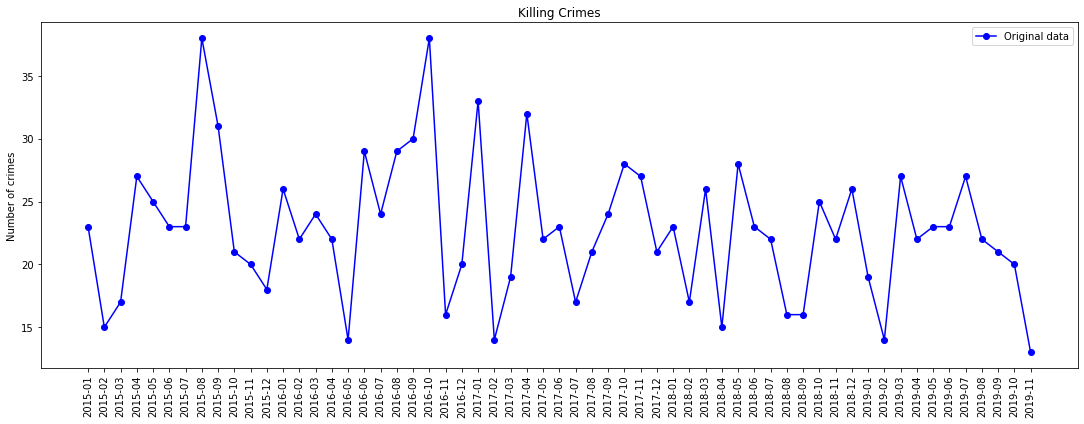

In [120]:
df["DATE"] = pd.to_datetime(df['DATE OCC'])
timeOccurences = df[["DATE","Crm Cd"]]

# only draw from 2015 to 2019
filterData = timeOccurences.set_index("DATE").loc['01/01/2015 12:00:00 AM':'12/31/2019 12:00:00 AM']

filterData.reset_index(inplace=True)
filterData['DATE'] = filterData['DATE'].map(lambda x:x.strftime("%Y-%m"))
killingData = filterData[filterData["Crm Cd"] == 110]
print(filterData)

fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(killingData.groupby('DATE').count(), 
          c = 'blue', label = "Original data",marker = "o")
# axes.plot(timeOccurencesDedup.groupby('YEARMONTH').count(), 
#           c = 'green', label = "Dedup data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Killing Crimes every month")
axes.set_ylabel("Number of crimes")

In [123]:
tx = pd.read_csv('revised_tax_income.csv')
# zipcode=pd.read_csv('revised_tax_income.csv',sep = ';')
tx

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2017,91775,CA,San Gabriel,Los Angeles,11301,896920720,39885616,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.10722900000002 34.099203),NaN
1,2017,90001,CA,Los Angeles,Los Angeles,21596,633896704,5884996,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.24915400000002 33.973252)
2,2017,90002,CA,Los Angeles,Los Angeles,19915,576005270,5042436,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.247877 33.949079)
3,2017,91755,CA,Monterey Park,Los Angeles,15063,636889907,19992841,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.127542 34.062407),POINT (-118.11527900000002 34.048584)
4,2017,90213,CA,Beverly Hills,Los Angeles,426,63811566,4916474,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.40467899999999 34.080294),POINT (-118.40467899999999 34.080294)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,2010,91385,CA,Valencia,Los Angeles,157,27221900,1232517,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.564722 34.389444),POINT (-118.56 34.39)
2745,2010,90095,CA,Los Angeles,Los Angeles,52,5601348,376048,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.442809 34.070475)
2746,2010,90280,CA,South Gate,Los Angeles,36513,1084164598,16254125,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.206087 33.954211),POINT (-118.19452000000001 33.943676)
2747,2010,90101,CA,Los Angeles,Los Angeles,14,536896,13819,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.243344 34.052238)


In [121]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.reverse("34.089459,-118.328500")
location.raw["address"]#["postcode"]

{'house_number': '1015',
 'road': 'North Cahuenga Boulevard',
 'neighbourhood': 'Whitley Heights Historic District',
 'suburb': 'Hollywood',
 'city': 'Los Angeles',
 'county': 'Los Angeles County',
 'state': 'California',
 'postcode': '90038',
 'country': 'United States of America',
 'country_code': 'us'}

## Time Trend with tax income

In [7]:
from geopy.geocoders import Nominatim
import re

In [16]:
seriousCrime = df[df["Crm Cd"] == 110]
seriousCrime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
113,100100811,04/16/2010 12:00:00 AM,04/16/2010 12:00:00 AM,510,1,Central,154,1,110,CRIMINAL HOMICIDE,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,500 S LOS ANGELES ST,NaN,34.0461,-118.2476
404,100101605,11/15/2010 12:00:00 AM,11/14/2010 12:00:00 AM,1245,1,Central,157,1,110,CRIMINAL HOMICIDE,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427
524,100104269,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,1030,1,Central,138,1,110,CRIMINAL HOMICIDE,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,400 E 4TH ST,NaN,34.0458,-118.2430
2488,100110330,05/05/2010 12:00:00 AM,01/15/2010 12:00:00 AM,1200,1,Central,134,1,110,CRIMINAL HOMICIDE,...,IC,Invest Cont,110.0,NaN,NaN,NaN,300 S HILL ST,NaN,34.0517,-118.2491
3459,100112967,06/24/2010 12:00:00 AM,06/24/2010 12:00:00 AM,2000,1,Central,166,1,110,CRIMINAL HOMICIDE,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,7TH ST,SAN JULIAN,34.0407,-118.2468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084399,191300596,03/10/2019 12:00:00 AM,03/10/2019 12:00:00 AM,24,13,Newton,1321,1,110,CRIMINAL HOMICIDE,...,IC,Invest Cont,110.0,998.0,NaN,NaN,200 E ADAMS BL,NaN,34.0289,-118.2686
2086110,191200746,09/13/2019 12:00:00 AM,09/13/2019 12:00:00 AM,1426,12,77th Street,1253,1,110,CRIMINAL HOMICIDE,...,AA,Adult Arrest,110.0,NaN,NaN,NaN,1700 W FLORENCE AV,NaN,33.9746,-118.3068
2086120,191221484,08/29/2019 12:00:00 AM,08/29/2019 12:00:00 AM,1120,12,77th Street,1256,1,110,CRIMINAL HOMICIDE,...,IC,Invest Cont,110.0,NaN,NaN,NaN,FLOWER ST,74TH ST,33.9727,-118.2813
2086658,190407949,04/01/2019 12:00:00 AM,04/01/2019 12:00:00 AM,1457,4,Hollenbeck,424,1,110,CRIMINAL HOMICIDE,...,IC,Invest Cont,110.0,998.0,NaN,NaN,3500 VALLEY BL,NaN,34.0700,-118.1998


In [18]:

geolocator = Nominatim(user_agent="111")
# df_location = seriousCrime[["LAT", "LON"]]
# df_location["ZIP_CODE"] = df_location.apply(lambda row:geolocator.reverse(row["LAT"], row["LON"]).address)
# search = SearchEngine(simple_zipcode=False)
# result = search.by_coordinates(39.122229, -77.133578, radius=30, returns=5)
# print(result[0].zipcode)
def zip_return(row):
    reg = re.compile(r"(90\d\d\d)")
    combine_loc = str(row['LAT']) + ", " + str(row['LON'])
    value = geolocator.reverse(combine_loc,timeout=15).raw["address"]["postcode"]
    try:
        value = re.search(r'(90\d\d\d)', value).group(0)
    except:
        value = -1
    print(value)
    return value

def test_zip(row):
    result = search.by_coordinates(row["LAT"], row["LON"], radius=10, returns=1)
    print(result[0].zipcode)
    return result[0].zipcode

seriousCrime["ZIP_CODE"] = seriousCrime.apply(zip_return, axis = 1)

90013
90013
90013
90013
90014
90014
90014
90015
90026
90017
90057
90057
90057
90057
90057
90026
90057
90026
90015
90006
90026
90057
90057
90026
90057
90008
90043
90018
90018
90008
90018
90018
90007
90007
90008
90008
90037
90043
90016
90062
90037
90033
90042
90031
90023
90033
90033
90063
90033
90023
90033
90031
90033
90032
90063
90033
90033
90023
90023
90033
90033
90033
90717
90501
90731
90744
90744
90744
90731
90501
90731
90710
90502
90744
90744
90744
90744
90744
90731
90029
90029
90029
90038
90028
90068
90029
90028
90038
90028
90029
90019
90019
90019
90018
90019
90035
90064
90034
-1
-1
-1
-1
-1
-1
-1
-1
-1
90042
90065
90029
90065
90065
90065
90029
90042
90001
90047
90047
90043
90044
90047
90047
90044
90044
90043
90043
90001
90043
90003
90047
90037
90037
90043
90044
90047
90008
90037
90003
90043
90003
90044
90043
90003
90047
90047
90044
90001
90047
90003
90044
90043
90047
90047
90047
90011
90011
90011
90011
90021
90011
90011
90011
90011
90003
90003
90011
90011
90003
90003
90003
90037
9

GeocoderQuotaExceeded: ('HTTP Error 429: Too Many Requests', 'occurred at index 348460')

In [23]:
search = SearchEngine(simple_zipcode=False)

count = 0
def test_zip(row):
    try:
        result = search.by_coordinates(row["LAT"], row["LON"], radius=10, returns=1)
        global count
        count = count + 1
        if count % 1000 == 0:
            print("finished 100")
        return result[0].zipcode
    except:
        result = -1
        return result

seriousCrime["ZIP_CODE"] = seriousCrime.apply(test_zip, axis = 1)
seriousCrime.to_csv("Seriescombine.csv")

finished 100
finished 100


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [12]:
seriesDF = pd.read_csv('Seriescombine.csv')
seriesDF["DATE OCC"] = pd.to_datetime(seriesDF['DATE OCC'])
seriesDF['YEAR']=seriesDF["DATE OCC"].dt.year

In [13]:
reviseTexIncome = pd.read_csv("revised_tax_income.csv")
reviseTexIncome

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2017,91775,CA,San Gabriel,Los Angeles,11301,896920720,39885616,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.10722900000002 34.099203),NaN
1,2017,90001,CA,Los Angeles,Los Angeles,21596,633896704,5884996,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.24915400000002 33.973252)
2,2017,90002,CA,Los Angeles,Los Angeles,19915,576005270,5042436,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.247877 33.949079)
3,2017,91755,CA,Monterey Park,Los Angeles,15063,636889907,19992841,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.127542 34.062407),POINT (-118.11527900000002 34.048584)
4,2017,90213,CA,Beverly Hills,Los Angeles,426,63811566,4916474,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.40467899999999 34.080294),POINT (-118.40467899999999 34.080294)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,2010,91385,CA,Valencia,Los Angeles,157,27221900,1232517,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.564722 34.389444),POINT (-118.56 34.39)
2745,2010,90095,CA,Los Angeles,Los Angeles,52,5601348,376048,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.442809 34.070475)
2746,2010,90280,CA,South Gate,Los Angeles,36513,1084164598,16254125,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.206087 33.954211),POINT (-118.19452000000001 33.943676)
2747,2010,90101,CA,Los Angeles,Los Angeles,14,536896,13819,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.243344 34.052238)


In [14]:
killCrimeCombineTax = seriesDF.merge(reviseTexIncome, left_on=["YEAR","ZIP_CODE"], right_on=["Taxable Year","Zip Code"])
killCrimeCombineTax

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,113,100100811,04/16/2010 12:00:00 AM,2010-04-16,510,1,Central,154,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
1,3459,100112967,06/24/2010 12:00:00 AM,2010-06-24,2000,1,Central,166,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
2,3908,100114135,07/19/2010 12:00:00 AM,2010-07-19,30,1,Central,155,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
3,4572,100116102,08/25/2010 12:00:00 AM,2010-08-25,1645,1,Central,166,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
4,6590,100121447,12/12/2010 12:00:00 AM,2010-12-12,1150,1,Central,185,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,1660192,171508100,03/10/2017 12:00:00 AM,2017-03-10,1940,15,N Hollywood,1515,1,110,...,North Hollywood,Los Angeles,20621,849848894,21368573,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.378098 34.172199),POINT (-118.390068 34.186458)
2069,1633727,170707950,04/01/2017 12:00:00 AM,2017-04-01,205,7,Wilshire,764,1,110,...,Los Angeles,Los Angeles,29746,1589096118,63500867,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.340015 34.048752)
2070,1640723,170916780,09/11/2017 12:00:00 AM,2017-09-10,2323,9,Van Nuys,932,1,110,...,Van Nuys,Los Angeles,10914,589080180,22358904,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.44809700000002 34.186699),POINT (-118.459943 34.177853)
2071,1649258,171808179,03/17/2017 12:00:00 AM,2017-03-17,2005,18,Southeast,1881,1,110,...,Gardena,Los Angeles,22947,991082754,23563857,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.30914399999999 33.883764),POINT (-118.29662099999999 33.89181)


In [15]:
# Rich 
killCrimeCombineRichTax = killCrimeCombineTax[killCrimeCombineTax["Returns"] > 20000]

# Poor
killCrimeCombinePoorTax = killCrimeCombineTax[killCrimeCombineTax["Returns"] < 20000]
killCrimeCombinePoorTax

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,113,100100811,04/16/2010 12:00:00 AM,2010-04-16,510,1,Central,154,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
1,3459,100112967,06/24/2010 12:00:00 AM,2010-06-24,2000,1,Central,166,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
2,3908,100114135,07/19/2010 12:00:00 AM,2010-07-19,30,1,Central,155,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
3,4572,100116102,08/25/2010 12:00:00 AM,2010-08-25,1645,1,Central,166,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
4,6590,100121447,12/12/2010 12:00:00 AM,2010-12-12,1150,1,Central,185,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,1587035,170405138,01/27/2017 12:00:00 AM,2017-01-27,1655,4,Hollenbeck,409,1,110,...,Los Angeles,Los Angeles,19988,854291737,20773742,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.177882 34.080773)
2063,1598081,171509756,04/07/2017 12:00:00 AM,2017-04-07,1000,15,N Hollywood,1599,1,110,...,Universal City,Los Angeles,17,8901479,947053,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.352501 34.138901),POINT (-118.35271500000002 34.139578)
2064,1602368,170805616,02/05/2017 12:00:00 AM,2017-02-05,1715,8,West LA,889,1,110,...,Los Angeles,Los Angeles,14335,1503209994,92581452,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),NaN
2066,1612090,171100789,09/24/2017 12:00:00 AM,2017-09-24,3,11,Northeast,1124,1,110,...,Glendale,Los Angeles,16611,716560259,20395788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.246437 34.148138),POINT (-118.243347 34.136458)


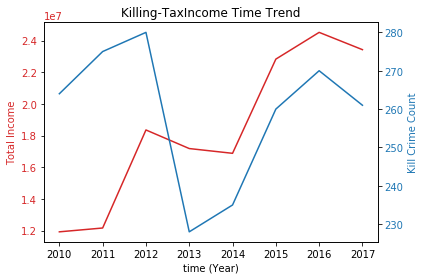

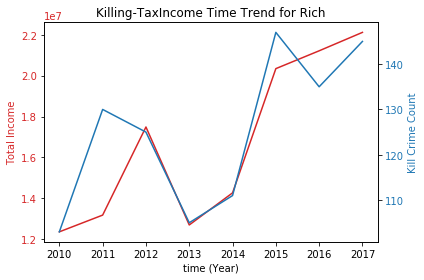

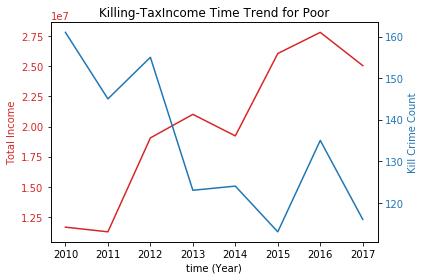

In [19]:
def drawTaxCrimeTimeTrend(data,title):
    XYear = [i+2010 for i in range(8)]
    yIncome = data.groupby("YEAR").mean()["Total Tax Liability"].tolist()
#     print(yIncome)
    yCrimeCount = data.groupby("YEAR").count()["DATE OCC"].tolist()
#     print(yCrimeCount) 
    import numpy as np
    import matplotlib.pyplot as plt

    # fig, ax1 = plt.subplots()
    fig, income = plt.subplots()


    color = 'tab:red'
    income.set_xlabel('time (Year)')
    income.set_ylabel('Total Income', color=color)
    income.plot(XYear, yIncome, color=color)
    income.tick_params(axis='y', labelcolor=color)

    crimeCount = income.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    crimeCount.set_ylabel('Kill Crime Count', color=color)  # we already handled the x-label with ax1
    crimeCount.plot(XYear, yCrimeCount, color=color)
    crimeCount.tick_params(axis='y', labelcolor=color)
    income.set_title(title)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    # tmp.groupby("YEAR")
drawTaxCrimeTimeTrend(killCrimeCombineTax,"Killing-TaxIncome Time Trend")
drawTaxCrimeTimeTrend(killCrimeCombineRichTax,"Killing-TaxIncome Time Trend for Rich")
drawTaxCrimeTimeTrend(killCrimeCombinePoorTax,"Killing-TaxIncome Time Trend for Poor")

In [17]:
RobCrime = df[df["Crm Cd"] == 210]
RobCrime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE
11,100100522,01/15/2010 12:00:00 AM,01/14/2010 12:00:00 AM,2000,1,Central,158,1,210,ROBBERY,...,Adult Other,210.0,NaN,NaN,NaN,ALAMEDA ST,7TH ST,34.0350,-118.2386,2010-01-14
14,100100531,01/16/2010 12:00:00 AM,01/15/2010 12:00:00 AM,2030,1,Central,127,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,1ST,LOS ANGELES,34.0515,-118.2424,2010-01-15
17,100100553,01/23/2010 12:00:00 AM,01/23/2010 12:00:00 AM,1100,1,Central,166,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,600 SAN JULIAN ST,NaN,34.0428,-118.2461,2010-01-23
19,100100561,01/26/2010 12:00:00 AM,01/26/2010 12:00:00 AM,1820,1,Central,119,1,210,ROBBERY,...,Adult Arrest,210.0,NaN,NaN,NaN,800 N ALAMEDA ST,NaN,34.0563,-118.2374,2010-01-26
41,100100630,02/15/2010 12:00:00 AM,02/15/2010 12:00:00 AM,100,1,Central,123,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,1ST ST,HILL ST,34.0544,-118.2466,2010-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087122,190719964,11/24/2019 12:00:00 AM,11/24/2019 12:00:00 AM,45,7,Wilshire,749,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,CRENSHAW BL,OLYMPIC BL,34.0547,-118.3230,2019-11-24
2087140,190209661,04/14/2019 12:00:00 AM,04/14/2019 12:00:00 AM,300,2,Rampart,257,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,1500 WILSHIRE BL,NaN,34.0546,-118.2684,2019-04-14
2087152,191706836,03/04/2019 12:00:00 AM,03/04/2019 12:00:00 AM,710,17,Devonshire,1776,1,210,ROBBERY,...,Invest Cont,210.0,998.0,NaN,NaN,9600 GERALD AV,NaN,34.2453,-118.4948,2019-03-04
2087193,190404513,01/12/2019 12:00:00 AM,01/12/2019 12:00:00 AM,1620,4,Hollenbeck,467,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,4TH ST,MATHEWS,34.0401,-118.2106,2019-01-12


In [ ]:
search = SearchEngine(simple_zipcode=False)

count = 0
def test_zip(row):
    try:
        result = search.by_coordinates(row["LAT"], row["LON"], radius=10, returns=1)
        global count
        count = count + 1
        if count % 1000 == 0:
            print("finished 100")
        return result[0].zipcode
    except:
        result = -1
        return result

RobCrime["ZIP_CODE"] = RobCrime.apply(test_zip, axis = 1)
RobCrime.to_csv("RobCrime.csv")

In [24]:
RobCrime = pd.read_csv('RobCrime.csv')
RobCrime["DATE OCC"] = pd.to_datetime(RobCrime['DATE OCC'])
RobCrime['YEAR']=RobCrime["DATE OCC"].dt.year

In [25]:
reviseTexIncome = pd.read_csv("revised_tax_income.csv")
reviseTexIncome

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2017,91775,CA,San Gabriel,Los Angeles,11301,896920720,39885616,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.10722900000002 34.099203),NaN
1,2017,90001,CA,Los Angeles,Los Angeles,21596,633896704,5884996,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.24915400000002 33.973252)
2,2017,90002,CA,Los Angeles,Los Angeles,19915,576005270,5042436,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.247877 33.949079)
3,2017,91755,CA,Monterey Park,Los Angeles,15063,636889907,19992841,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.127542 34.062407),POINT (-118.11527900000002 34.048584)
4,2017,90213,CA,Beverly Hills,Los Angeles,426,63811566,4916474,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.40467899999999 34.080294),POINT (-118.40467899999999 34.080294)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,2010,91385,CA,Valencia,Los Angeles,157,27221900,1232517,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.564722 34.389444),POINT (-118.56 34.39)
2745,2010,90095,CA,Los Angeles,Los Angeles,52,5601348,376048,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.442809 34.070475)
2746,2010,90280,CA,South Gate,Los Angeles,36513,1084164598,16254125,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.206087 33.954211),POINT (-118.19452000000001 33.943676)
2747,2010,90101,CA,Los Angeles,Los Angeles,14,536896,13819,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.243344 34.052238)


In [26]:
RobCrimeCombimeTax = RobCrime.merge(reviseTexIncome, left_on=["YEAR","ZIP_CODE"], right_on=["Taxable Year","Zip Code"])


# Rich 
RobCrimeCombimeRichTax = RobCrimeCombimeTax[RobCrimeCombimeTax["Returns"] > 20000]

# Poor
RobCrimeCombimePoorTax = RobCrimeCombimeTax[RobCrimeCombimeTax["Returns"] < 15000]




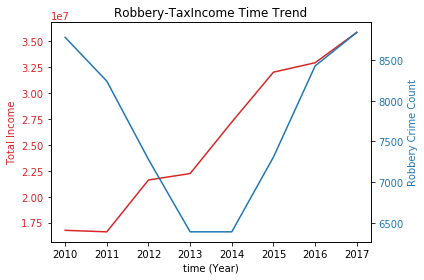

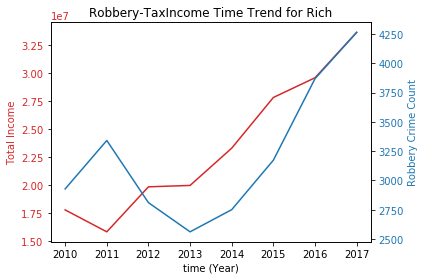

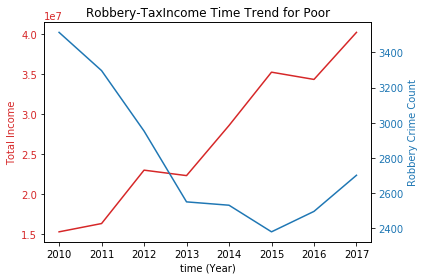

In [28]:
def drawTaxCrimeTimeTrend(data,title):    
    XYear = [i+2010 for i in range(8)]

    yIncome = data.groupby("YEAR").mean()["Total Tax Liability"].tolist()
#     print(yIncome)
    yCrimeCount = data.groupby("YEAR").count()["DATE OCC"].tolist()
#     print(yCrimeCount)

    # fig, ax1 = plt.subplots()
    fig, income = plt.subplots()

    color = 'tab:red'
    income.set_xlabel('time (Year)')
    income.set_ylabel('Total Income', color=color)
    income.plot(XYear, yIncome, color=color)
    income.tick_params(axis='y', labelcolor=color)

    crimeCount = income.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    crimeCount.set_ylabel('Robbery Crime Count', color=color)  # we already handled the x-label with ax1
    crimeCount.plot(XYear, yCrimeCount, color=color)
    crimeCount.tick_params(axis='y', labelcolor=color)
    income.set_title(title)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
# tmp.groupby("YEAR")

drawTaxCrimeTimeTrend(RobCrimeCombimeTax,"Robbery-TaxIncome Time Trend")
drawTaxCrimeTimeTrend(RobCrimeCombimeRichTax,"Robbery-TaxIncome Time Trend for Rich")
drawTaxCrimeTimeTrend(RobCrimeCombimePoorTax,"Robbery-TaxIncome Time Trend for Poor")


In [6]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacity.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("63jg-8b9z",limit= 3000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [7]:
results_df


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_1,location,lat,lon,cross_street,weapon_used_cd,weapon_desc,crm_cd_2,crm_cd_3,crm_cd_4
0,001307355,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,900,300 E GAGE AV,33.9825,-118.2695,NaN,NaN,NaN,NaN,NaN,NaN
1,011401303,2010-09-13T00:00:00.000,2010-09-12T00:00:00.000,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740,SEPULVEDA BL,33.9599,-118.3962,MANCHESTER AV,NaN,NaN,NaN,NaN,NaN
2,070309629,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,946,1300 E 21ST ST,34.0224,-118.2524,NaN,NaN,NaN,NaN,NaN,NaN
3,090631215,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,0150,06,Hollywood,0646,2,900,VIOLATION OF COURT ORDER,...,900,CAHUENGA BL,34.1016,-118.3295,HOLLYWOOD BL,102,HAND GUN,998,NaN,NaN
4,100100501,2010-01-03T00:00:00.000,2010-01-02T00:00:00.000,2100,01,Central,0176,1,122,"RAPE, ATTEMPTED",...,122,8TH ST,34.0387,-118.2488,SAN PEDRO ST,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087204,190608903,2019-03-28T00:00:00.000,2019-03-28T00:00:00.000,0400,06,Hollywood,0644,1,648,ARSON,...,648,1400 N LA BREA AV,34.0962,-118.349,NaN,506,FIRE,NaN,NaN,NaN
2087205,190715222,2019-08-15T00:00:00.000,2019-08-14T00:00:00.000,1810,07,Wilshire,0701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,331,WILLOUGHBY AV,34.0871,-118.3732,ORLANDO AV,NaN,NaN,NaN,NaN,NaN
2087206,192004409,2019-01-06T00:00:00.000,2019-01-06T00:00:00.000,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,930,6TH,34.0637,-118.287,VIRGIL,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,NaN
2087207,191716777,2019-10-17T00:00:00.000,2019-10-16T00:00:00.000,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,420,17200 NAPA ST,34.2266,-118.5085,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ftb.ca.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.ftb.ca.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("mriu-wsxf", limit=1000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [9]:
results_df

,taxable_year,zip_code,state,city,county,returns,ca_agi,total_tax_liability,countylatitude,countylongitude,geo_county,geo_city,:@computed_region_fs3r_2bk8,:@computed_region_8xky_9gpe,geo_zipcode,:@computed_region_wuf4_3eum
0,1993,91718,CA,Corona,Riverside,798,23863893,804115,33.7775741,-115.4706931,"{'type': 'Point', 'coordinates': [-115.4706931...","{'type': 'Point', 'coordinates': [-117.568843,...",58,326,NaN,NaN
1,2017,91775,CA,San Gabriel,Los Angeles,11301,896920720,39885616,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-118.1072290...",8,152,NaN,NaN
2,2017,90025,CA,Los Angeles,Los Angeles,26807,4547960264,396826061,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-118.243344,...",8,89,NaN,NaN
3,2017,94101,CA,San Francisco,San Francisco,11,26209763,3100806,37.7577,-122.4376,"{'type': 'Point', 'coordinates': [-122.4375999...","{'type': 'Point', 'coordinates': [-122.4201679...",42,17,NaN,NaN
4,2016,90020,CA,Los Angeles,Los Angeles,18228,1175131292,70242796,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-118.243344,...",8,89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,1995,91765,CA,Diamond Bar,Los Angeles,18935,915598402,35551333,34.0594833,-118.242048,"{'type': 'Point', 'coordinates': [-118.2420480...","{'type': 'Point', 'coordinates': [-117.835257,...",8,60,NaN,NaN
61499,1992,93596,CA,Boron,Kern,330,9567294,224193,35.37676773,-118.8073572,"{'type': 'Point', 'coordinates': [-118.8073572...","{'type': 'Point', 'coordinates': [-117.649787,...",52,1314,"{'type': 'Point', 'coordinates': [-117.649787,...",662
61500,1992,95501,CA,Eureka,Humboldt,12659,307315950,8930170,40.86148517,-123.8585124,"{'type': 'Point', 'coordinates': [-123.8585124...","{'type': 'Point', 'coordinates': [-124.161309,...",6,1384,"{'type': 'Point', 'coordinates': [-124.157467,...",1754
61501,1994,93777,CA,Fresno,Fresno,24,704950,21652,36.81276025,-119.6826941,"{'type': 'Point', 'coordinates': [-119.6826941...","{'type': 'Point', 'coordinates': [-119.7858560...",5,929,"{'type': 'Point', 'coordinates': [-119.7858560...",1591
